## Regression

### Simple Linear Regression
- 단순 선형 회귀
- $y = \beta_{0} + \beta_{1} x + \epsilon$
- 하나의 X 값을 가지고 Y를 예측하는 것
- \beta_{0} 는 절편. \epsilon$ 는 오차
- 문제를 해결할 때 많이 사용되는게 아니라 회귀에 대한 설명을 할 때 예시로 많이 쓰여짐(그래프 증명 등).

### Multiple Linear Regression
- 다중 회귀
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 여러 개의 X 값을 가지고 Y를 예측하는 것
- 실제로 많이 씀. 데이터에는 오차가 있으니 오차도 표시.

### Polynomial Regression
- 다항 회귀
- 다항식: 제곱, 세제곱 이런 것들을 가지고 있을 수 있음
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움(학습을 잘해서)
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

### Ridge, Lasso Regression
- 독립변수들 간에 높은 상관 관계가 있는 경우 규제화(정규화) (regularization)를 적용해 모델의 복잡도를 줄임
- Ridge : 계수값(기울기)을 0 에 가깝게 만들지만 0 이 되지 않음
    - 모든 독립변수들이 Y를 만들때 다 참여(정도의 차이는 있음)
- Lasso : 계수값을 0 이 되게 함으로써 그에 해당하는 특성을 제외
    - 독립변수 중에서 사용하지 않는 것을 뽑아낼 수 있음. 중요한 것들만 사용해서 Y값을 예측해내겠다는 것.

데이터 생성 후 회귀분석 연습

In [ ]:
import pandas as pd
import numpy as np

# bmi = 몸무게(kg) ÷ (신장(m) × 신장(m)) 단위
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
# startno : ID의 시작 번호
# outlier : 이상치 비율, 0.01 => 100개 정상데이터 1개 이상치
def make_sample(seedno, size, startno=0, outlier=0):
    np.random.seed(seedno)
    outlier_len = int(size * outlier)
    sizeh = size//2
    # 키 단위 cm
    hm = np.random.normal(loc=175, scale=5.3, size= sizeh+1 if size % 2 else sizeh).round(1)
    hw = np.random.normal(loc=162, scale=5.2, size = sizeh).round(1)
    # sizeh+1 if size % 2 else sizeh 에서 조건(size % 2)이 참이면 앞에있는 것, 거짓이면 뒤에있는 것 전달
    h = np.concatenate([hm, hw])
    h /= 100   # m 단위로 변경한 것
    bmi = np.random.normal(loc=23, scale=4, size=len(h))   # loc은 평균, scale은 표준편차
    w = (h*h*bmi).round(1)
    bmi = (w / (h*h)).round(2)
    h *= 100   # 다시 단위를 cm로 변경
    data = np.column_stack([h, w, bmi])  # 3가지 값을 갖는 데이터가 여러개 있는 2차원 배열이 나오게 됨

    # outlier 붙히기(이상치 데이터 추가)
    if outlier_len != 0:
      data_outlier = make_outlier(seedno, outlier_len)
      print(data_outlier, data_outlier.shape, sep='\n')
      data = np.concatenate([data, data_outlier])

    # 'ID'를 포함한 DataFrame 생성 및 반환
    data = pd.DataFrame(data, columns=['height', 'weight', 'BMI'])
    data = data.sample(frac=1)  # 전체 데이터를 섞어서 반환하게 됨
    data.insert(0, 'ID', np.arange(startno, startno + len(data), dtype='int'))  # ID 를 맨 앞(0)에 주기 위해서. inplace 동작이라 다시 대입 안해도 됨
    return data

# 이상치 만드는 함수 작성
# bmi = #몸무게(kg) ÷ (신장(m) × 신장(m))
# 키, 몸무게가 매우 작거나 큰 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수(이상치의 개수)
def make_outlier(seedno, size):
    np.random.seed(seedno)
    sizeh = size//2
    hlow = np.random.normal(loc=120, scale=5.3, size = sizeh+1 if size % 2 else sizeh).round(1)
    hhigh = np.random.normal(loc=220, scale=5.2, size = sizeh).round(1)
    h = np.concatenate([hlow, hhigh])
    h /= 100
    bmi = np.random.normal(loc=23, scale=10, size=len(h))
    w = (h*h*bmi).round(1)
    bmi = (w / (h*h)).round(2)
    h *= 100
    return np.column_stack([h, w, bmi])


In [ ]:
train = make_sample(1234, 100)
test = make_sample(1, 100, len(train))
Xfeatures = ['ID', 'height', 'weight']
Yfeatures = ['ID', 'BMI']
Xtrain = train[Xfeatures]
Ytrain = train[Yfeatures]
Xtest = test[Xfeatures]
Ytest = test[Yfeatures]

In [ ]:
dfXY = pd.merge(Xtrain, Ytrain)
print(dfXY.shape)
# dfXY의 상관 관계 확인
dfXY.corr()  # 체중하고 BMI가 큰 관련이 있음

(100, 4)


,ID,height,weight,BMI
ID,1.0000,0.1407,-0.0230,-0.1083
height,0.1407,1.0000,0.6040,0.1789
weight,-0.0230,0.6040,1.0000,0.8877
BMI,-0.1083,0.1789,0.8877,1.0000


모델링 & 성능 평가

In [ ]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 데이터를 분리하고, 학습 한 뒤 R2_score 를 구해 출력
def Model_Train(model, XF, YF, scale=False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    if scale:
       XF = MinMaxScaler().fit_transform(XF)  # scale이 True가 되면 scaling 사용
    x_train, x_test, y_train, y_test = train_test_split(XF, YF,
                                                        test_size=0.3,
                                                        random_state=321)
    model.fit(x_train, y_train)
    A = model.score(x_train, y_train)  # train에 관한 R2 score
    B = model.score(x_test, y_test)   # test에 관한 R2 score
    print(f'{A:.4f} {B:.4f}')
    return model

#### Multiple Linear Regression

In [ ]:
# outlier가 포함되지 않은 경우, LinearRegression 모델 사용
Xnormal = Xtrain[['height', 'weight']]
Ynormal = Ytrain['BMI']
model = LinearRegression()
Model_Train(model, Xnormal, Ynormal) # 0.9931 0.9625

print(model.coef_, model.intercept_)

0.9931 0.9625
[-0.28008565  0.34383133] 47.62901862599368


In [ ]:
# [이상치를 포함한 데이터 생성 (outlier=0.07 사용)
Toutlier = make_sample(1234, 100, outlier=0.07)  # 이상치 7개
Xoutlier = Toutlier[['height', 'weight']]
Youtlier = Toutlier['BMI']

model2 = LinearRegression()
Model_Train(model2, Xoutlier, Youtlier) # 0.9296 0.4557

[[122.5   25.    16.66]
 [113.7   29.9   23.13]
 [127.6    0.9    0.55]
 [118.3   48.3   34.51]
 [216.3  154.    32.92]
 [224.6  164.1   32.53]
 [224.5   14.     2.78]]
(7, 3)
0.9296 0.4557


LinearRegression()

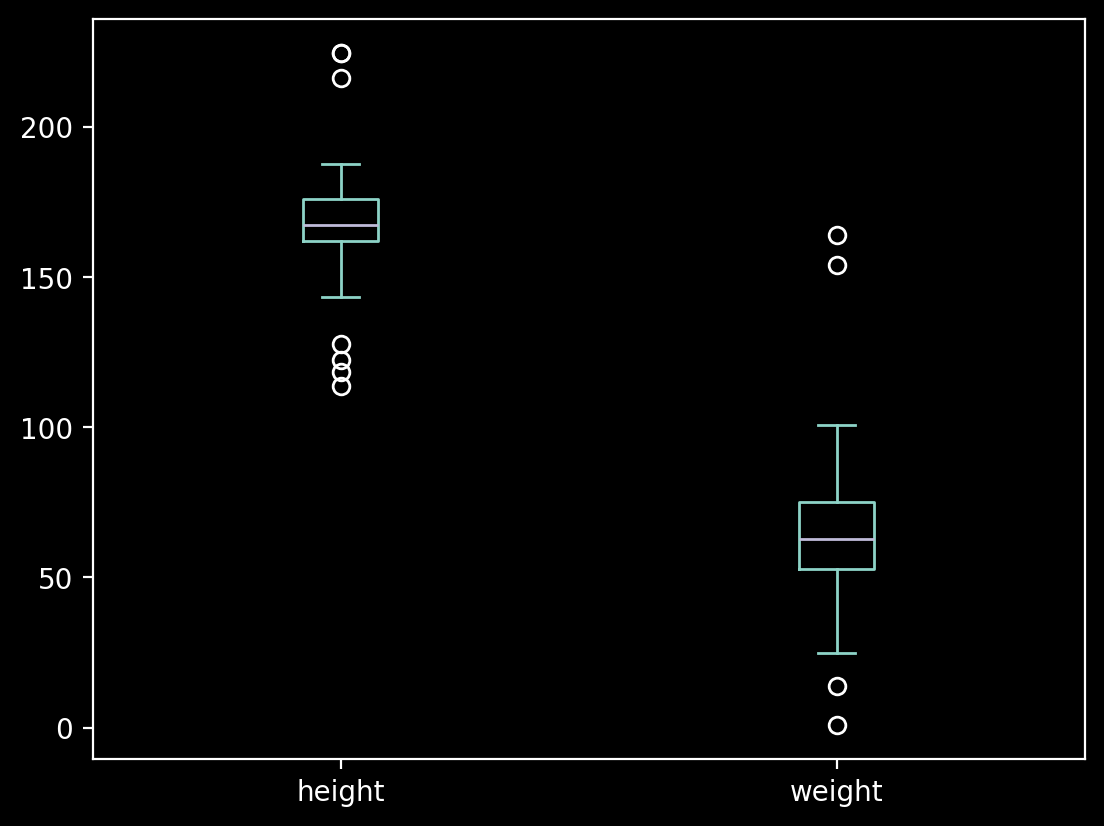

In [ ]:
Xoutlier.plot(kind='box')
plt.show()

In [ ]:
# 각 feature별 Q1, Q3 확인
Xoutlier.quantile([0.25, 0.75])

,height,weight
0.2500,162.0000,52.7500
0.7500,175.8500,75.0000


In [ ]:
# height에 대한 outlier 확인
Q1, Q3 = Xoutlier['height'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_h = round(Q1 - IQR * 1.5, 3)
upper_h = round(Q3 + IQR * 1.5, 3)
print(lower_h, upper_h)

141.225 196.625


In [ ]:
# weight에 대한 outlier 확인
Q1, Q3 = Xoutlier['weight'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_w = round(Q1 - IQR * 1.5, 3)
upper_w = round(Q3 + IQR * 1.5, 3)
print(lower_w, upper_w)

19.375 108.375


In [ ]:
# height에 대한 outlier 제거 및 학습
height = Xoutlier['height']
outlier_h = Xoutlier[(height < lower_h) | (height > upper_h)]
#print(outlier_h)

Xoutlier_rh = Xoutlier.drop(index=outlier_h.index)
Youtlier_rh = Youtlier.drop(index=outlier_h.index)
#print(Xoutlier_rh.shape, Youtlier_rh.shape)

model3 = LinearRegression()
Model_Train(model3, Xoutlier_rh, Youtlier_rh)  # 성능이 좋아짐

0.9868 0.9935


LinearRegression()

In [ ]:
# [11] weight에 대한 outlier 제거 및 학습
weight = Xoutlier['weight']
outlier_w = Xoutlier[(weight < lower_w) | (weight > upper_w)]
#print(outlier_w)

Xoutlier_rw = Xoutlier.drop(index=outlier_w.index)
Youtlier_rw = Youtlier.drop(index=outlier_w.index)
#print(Xoutlier_rw.shape, Youtlier_rw.shape)

model4 = LinearRegression()
Model_Train(model4, Xoutlier_rw, Youtlier_rw)  # 성능이 좋아짐

0.9731 0.9217


LinearRegression()

#### Polynomial Regression
- 다항 회귀
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움(굉장히 학습이 잘됨)
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

In [ ]:
# x에 대해서 변환
# sklearn.preprocessing.PolynomialFeatures(degree=2, *,
#               interaction_only=False, include_bias=True, order='C')

In [ ]:
# PolynomialFeatures 사용하여 2차항이 포함되도록 Xnormal 을 변환 (PolynomialFeatures에 poly2, 변환 결과에 Xpoly2 이름 부여)
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2, include_bias=False) # interaction_only=True, include_bias=False, degree 생략하면 2
#기본적으로 include_bias=False 를 많이 씀. 상수항은 굳이 넣을 필요 없음
Xpoly2 = poly2.fit_transform(Xnormal)  # preprocessing 에는 fit, transform이 필요함
model = LinearRegression()
Model_Train(model, Xpoly2, Ynormal)

1.0000 0.9988


LinearRegression()

In [ ]:
# [13] Xpoly2의 shape 확인
print(Xnormal.shape, Xpoly2.shape)
# 기존에는 2개인데 Xpoly2 는 6개가 됨

(100, 2) (100, 5)


In [ ]:
Xnormal.columns

Index(['height', 'weight'], dtype='object')

In [ ]:
# poly2의 feature_names 확인
poly2.get_feature_names_out()  # 1이 bias 상수항. False 하면 없어짐 (include_bias=False)
# interaction_only=True 주면 3개로 줄어듬. 제곱항들이 빠진 것이기 때문.

array(['height', 'weight', 'height^2', 'height weight', 'weight^2'],
      dtype=object)

In [ ]:
# Xpoly2의 상관계수 확인
# Xpoly2.corr()  # dataframe이 아니라서 그냥 볼 수 없음
pd.DataFrame(Xpoly2).corr()

,0,1,2,3,4
0,1.000000,0.604015,0.999526,0.715850,0.602221
1,0.604015,1.000000,0.605356,0.987694,0.992038
2,0.999526,0.605356,1.000000,0.717912,0.605105
3,0.715850,0.987694,0.717912,1.000000,0.984456
4,0.602221,0.992038,0.605105,0.984456,1.000000


In [ ]:
Xpoly2[:5]  # 숫자들이 커짐. 그래서 normalize를 해서 단위를 줄여주는 것이 좀 더 좋은 편

array([[  163.1 ,    71.3 , 26601.61, 11629.03,  5083.69],
       [  175.1 ,    85.5 , 30660.01, 14971.05,  7310.25],
       [  174.  ,    78.  , 30276.  , 13572.  ,  6084.  ],
       [  171.2 ,    73.1 , 29309.44, 12514.72,  5343.61],
       [  160.2 ,    57.4 , 25664.04,  9195.48,  3294.76]])

In [ ]:
# PolynomialFeatures 사용하여 3차항이 포함되도록 Xnormal을 변환 함 (PolynomialFeatures에 poly3, 변환 결과에 Xpoly3 이름 부여)
poly3 = PolynomialFeatures(degree=3, include_bias=False)  #interaction_only=True 는 안주는 것이 일반적
Xpoly3 = poly3.fit_transform(Xnormal)  # preprocessing 에는 fit, transform이 필요함
model = LinearRegression()
Model_Train(model, Xpoly3, Ynormal)

0.9989 0.9976


LinearRegression()

In [ ]:
# Xpoly3의 shape 확인
print(Xpoly3.shape)

(100, 3)


In [ ]:
# poly3의 shape 확인
poly3.get_feature_names_out()

array(['height', 'weight', 'height weight'], dtype=object)

In [ ]:
Xpoly3[:5]  # 숫자들이 커서 지수형태로 표현됨. 그래서 이렇게 2차나 3차로 만든다면 숫자를 Scaling 하는 것이 필요함

array([[1.63100000e+02, 7.13000000e+01, 2.66016100e+04, 1.16290300e+04,
        5.08369000e+03, 4.33872259e+06, 1.89669479e+06, 8.29149839e+05,
        3.62467097e+05],
       [1.75100000e+02, 8.55000000e+01, 3.06600100e+04, 1.49710500e+04,
        7.31025000e+03, 5.36856775e+06, 2.62143085e+06, 1.28002477e+06,
        6.25026375e+05],
       [1.74000000e+02, 7.80000000e+01, 3.02760000e+04, 1.35720000e+04,
        6.08400000e+03, 5.26802400e+06, 2.36152800e+06, 1.05861600e+06,
        4.74552000e+05],
       [1.71200000e+02, 7.31000000e+01, 2.93094400e+04, 1.25147200e+04,
        5.34361000e+03, 5.01777613e+06, 2.14252006e+06, 9.14826032e+05,
        3.90617891e+05],
       [1.60200000e+02, 5.74000000e+01, 2.56640400e+04, 9.19548000e+03,
        3.29476000e+03, 4.11137921e+06, 1.47311590e+06, 5.27820552e+05,
        1.89119224e+05]])

#### Ridge Regression
- `sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)`
- coef(회귀계수)가 작아지지만 0이 되지는 않음
- alpha를 이용해서 규제 강도를 줄 수 있음 (Lasso 도 마찬가지)

In [ ]:
# alpha=0 : 규제를 주지 않음
# alpha 값이 크다는 것은 규제를 크게 주겠다는 것(작은 것은 작게 주겟다는 것)을 의미 => (규제가 크면)coef_ 값들이 작아짐

In [ ]:
# PolynomialFeatures degree=3과 Ridge를 사용한 모델링
from sklearn.linear_model import Ridge

poly3 = PolynomialFeatures(degree=3, include_bias=False)  #interaction_only=True 는 안주는 것이 일반적
Xpoly3 = poly3.fit_transform(Xnormal)  # preprocessing 에는 fit, transform이 필요함
ridge_coef = pd.DataFrame()

for a in [0, 0.001, 0.1, 1, 10]:
  print(f'alpha={a:7.4f}', end='  ')
  model = Ridge(alpha=a, random_state=0)
  Model_Train(model, Xpoly3, Ynormal, scale=True)  # 규제를 세게 준다고 해서 무조건 성능이 떨어지는 것은 아님.
  # Warning이 생김. 3차식으로 바뀌었으니 3승하는 것. 큰 값이 되기 때문에 굉장히 큰 값이 됨. Ridge 돌리면서 그런 값들 때문에 문제가 될 수 있어서
  # normalize 필요함  -> Model_Train 함수 약간 수정해보자 (Scale=True) -> Warning 없어짐.
  ridge_coef[f'alpha_{a}'] = model.coef_

alpha= 0.0000  1.0000 1.0000
alpha= 0.0010  0.9994 0.9962
alpha= 0.1000  0.9874 0.9499
alpha= 1.0000  0.9480 0.9279
alpha=10.0000  0.6938 0.6471


In [ ]:
# scaling 먼저 실행. 성능 비교
# X -> Xsclaed -> Xploy -> fit()
from sklearn.linear_model import Ridge

Xscaled = MinMaxScaler().fit_transform(Xnormal)
poly3 = PolynomialFeatures(degree=3, include_bias=False)  #interaction_only=True 는 안주는 것이 일반적
Xpoly3 = poly3.fit_transform(Xscaled)  # preprocessing 에는 fit, transform이 필요함
ridge_coef = pd.DataFrame()
for a in [0, 0.001, 0.1, 1, 10]:
  print(f'alpha={a:7.4f}', end='  ')
  model = Ridge(alpha=a, random_state=0)
  Model_Train(model, Xpoly3, Ynormal)  # 규제를 세게 준다고 해서 무조건 성능이 떨어지는 것은 아님.
  # Warning이 생김. 3차식으로 바뀌었으니 3승하는 것. 큰 값이 되기 때문에 굉장히 큰 값이 됨. Ridge 돌리면서 그런 값들 때문에 문제가 될 수 있어서
  # normalize 필요함  -> Model_Train 함수 약간 수정해보자 (Scale=True) -> Warning 없어짐.
  ridge_coef[f'alpha_{a}'] = model.coef_

alpha= 0.0000  1.0000 1.0000
alpha= 0.0010  0.9999 0.9977
alpha= 0.1000  0.9890 0.9754
alpha= 1.0000  0.9108 0.9137
alpha=10.0000  0.5942 0.5457


In [ ]:
# ridge_coef 출력하여 회귀계수 확인
ridge_coef  # 보편적으로 회귀계수들이 줄어듦. 답을 찾으면서 줄어듦

,alpha_0,alpha_0.001,alpha_0.1,alpha_1,alpha_10
0,-73.109478,-14.770202,-4.350133,-3.449517,-0.663046
1,131.354160,31.716423,11.090243,5.414167,2.308375
2,141.656039,-2.088447,-4.659543,-3.527552,-0.664110
3,-209.987752,1.363581,6.050911,3.443241,1.758562
4,0.799485,11.453945,4.517197,4.032551,2.143902
5,-69.080548,10.829774,-4.981092,-3.595744,-0.662633
6,94.806642,-14.604358,2.300521,1.985839,1.335582
7,-1.086255,-11.450236,1.205406,3.002338,1.903592
8,0.109442,-1.314782,-1.817746,2.610686,1.922268


In [ ]:
ridge_coef.abs().sum()  # Ridge에서는 0으로 되는 것은 보이지 않음.

alpha_0        721.989800
alpha_0.001     99.591749
alpha_0.1       40.972792
alpha_1         31.061635
alpha_10        13.362070
dtype: float64

#### Lasso Regression
- `sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`
- 규제강도가 커지면 회귀계수가 작아지고 0도 될 수 있다

In [ ]:
# 권장 순서
# X -> Xsclaed -> Xploy -> fit()
tX = pd.DataFrame({'A' : [1, 10, 100, 1000, 10000, 100000]})
tS = MinMaxScaler().fit_transform(tX)  # ndarray임
t4 = tS ** 4
t4  # 그래서 t4['A'] 가 안됨

array([[0.00000000e+00],
       [6.56126245e-17],
       [9.60634435e-13],
       [9.96045837e-09],
       [9.99640045e-05],
       [1.00000000e+00]])

In [ ]:
# 비권장 순서
# X -> Xploy -> Model_Train에 넘겨서 Xscaled -> fit()(학습)
# 위의 순서는 비권장 순서임.
tX = pd.DataFrame({'A' : [1, 10, 100, 1000, 10000, 100000]})
t4 = tX ** 4
t4['A']  # 생각했던 것과 다른 결과가 나옴. 맨 마지막에 엉뚱한 값이 나옴

0                      1
1                  10000
2              100000000
3          1000000000000
4      10000000000000000
5    7766279631452241920
Name: A, dtype: int64

In [ ]:
A = 1e20  # float 타입
type(A)  # float는 표현할 수 있는데 int는 표현하지 못한다는 것
# 아주 크거나 작은 숫자가 있다면 float 타입이 표현범위가 더 넓으니 사용하는 것이 유리함
# int 보다 float가 표현범위가 더 넓음을 기억.

float

In [ ]:
# int64로 표현할 수 있는 범위가 있음
-2**63, +2**63-1  # 왜 63승인가? 부호를 표현해야 하기 때문에 한 개의 비트를 빼는 것. 0이 양수로 취급되기 때문에 -1 한 것(양수에서)
# 아래 결과값이 최대의 표현 범위 (-9223372036854775808, 9223372036854775807)  총 19자리 수.
# 위에는 0이 20개에 앞에 1까지 있어야 함. 그래서 int64라는 type을 가지고는 원하는 숫자를 표현할 수 없음

(-9223372036854775808, 9223372036854775807)

In [ ]:
# degree=3과 Lasso를 사용한 모델링
from sklearn.linear_model import Lasso

poly3 = PolynomialFeatures(degree=3, include_bias=False)  #interaction_only=True 는 안주는 것이 일반적
Xpoly3 = poly3.fit_transform(Xnormal)  # preprocessing 에는 fit, transform이 필요함
lasso_coef = pd.DataFrame()
for a in [0.0001, 0.001, 0.1, 0.2, 0.3]:
  print(f'alpha={a:7.4f}', end='  ')
  model = Lasso(alpha=a, max_iter=1000, tol=0.001, random_state=0)
  Model_Train(model, Xpoly3, Ynormal, scale=True)  # 규제를 세게 준다고 해서 무조건 성능이 떨어지는 것은 아님.
  # Warning이 생김. 3차식으로 바뀌었으니 3승하는 것. 큰 값이 되기 때문에 굉장히 큰 값이 됨. Ridge 돌리면서 그런 값들 때문에 문제가 될 수 있어서
  # normalize 필요함  -> Model_Train 함수 약간 수정해보자 (Scale=True) -> Warning 없어짐.
  lasso_coef[f'alpha_{a}'] = model.coef_
  # warning이 나옴 ->  max_iter=1000, tol=0.001(tol 값과 max_iter를 키우면 해결
  # 가장 중요한 것은 alpha 값

alpha= 0.0001  0.9979 0.9938
alpha= 0.0010  0.9964 0.9851
alpha= 0.1000  0.9246 0.9180
alpha= 0.2000  0.7656 0.6763
alpha= 0.3000  0.7096 0.6361


In [ ]:
# scaling 먼저 하고 학습 실행. 성능이 조금 더 좋아짐
# X -> Xsclaed -> Xploy -> fit()
from sklearn.linear_model import Lasso
Xscaled = MinMaxScaler().fit_transform(Xnormal)
poly3 = PolynomialFeatures(degree=3, include_bias=False)  #interaction_only=True 는 안주는 것이 일반적
Xpoly3 = poly3.fit_transform(Xscaled)  # preprocessing 에는 fit, transform이 필요함
lasso_coef = pd.DataFrame()
for a in [0.0001, 0.001, 0.1, 0.2, 0.3]:
  print(f'alpha={a:7.4f}', end='  ')
  model = Lasso(alpha=a, max_iter=1000, tol=0.001, random_state=0)
  Model_Train(model, Xpoly3, Ynormal)  # 규제를 세게 준다고 해서 무조건 성능이 떨어지는 것은 아님.
  # Warning이 생김. 3차식으로 바뀌었으니 3승하는 것. 큰 값이 되기 때문에 굉장히 큰 값이 됨. Ridge 돌리면서 그런 값들 때문에 문제가 될 수 있어서
  # normalize 필요함  -> Model_Train 함수 약간 수정해보자 (Scale=True) -> Warning 없어짐.
  lasso_coef[f'alpha_{a}'] = model.coef_
  # warning이 나옴 ->  max_iter=1000, tol=0.001(tol 값과 max_iter를 키우면 해결
  # 가장 중요한 것은 alpha 값

alpha= 0.0001  0.9998 0.9985
alpha= 0.0010  0.9994 0.9986
alpha= 0.1000  0.9253 0.9262
alpha= 0.2000  0.7656 0.6763
alpha= 0.3000  0.7096 0.6361


In [ ]:
# lasso_coef 출력하여 회귀계수 확인
lasso_coef   # 0이 존재함

,alpha_0.0001,alpha_0.001,alpha_0.1,alpha_0.2,alpha_0.3
0,4.805105,-0.000000,-0.000000,-0.000000,-0.000000
1,33.607995,26.482969,17.107670,12.632765,10.690377
2,-17.123098,-11.091911,-0.000000,-0.000000,-0.000000
3,-2.296627,-0.160488,0.000000,0.000000,0.000000
4,0.000000,-0.000000,0.000000,0.000000,0.000000
5,4.748478,-0.000000,-5.281175,-0.000000,-0.000000
6,-10.289303,-1.800514,0.000000,0.000000,0.000000
7,-1.541214,-1.008017,0.000000,0.000000,0.000000
8,-0.905310,-2.147514,0.000000,0.000000,0.000000


In [ ]:
# Ridge, Lasso는 overfitting 되는 데이터에 주로 사용하여 overfitting 을 해결하는 용도로 사용한다
# Ridge, Lasso는 feature 들이 굉장히 많을 때. 그 feature들의 영향력을 줄일 때 사용. Lasso는 어떤 것에 대해 영향력을 아예 갖지 못하게 할 수도 있음
# scale=True. 정규화 하는 것 잊지말고 alpha 값을 잘 선택해야 함

#### DecisionTree
- 분류분석(DecisionTreeClassifier)와 회귀분석 모델명이 다름
- `sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)`

In [ ]:
# Xnormal, Ynormal 데이터에 DecisionTreeRegressor 사용
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
Model_Train(model, Xnormal, Ynormal)  # 1.0000 0.7371 과대적합이 나타남

1.0000 0.7371


DecisionTreeRegressor(random_state=0)

In [ ]:
Xnormal.shape

(100, 2)

In [ ]:
#  train  test
# 1.0000 0.7371  => overfitting, 과대적합. train은 다 맞췄는데 test는 많이 못 맞춘 것. 데이터가 적기 때문(100개)
# 과대적합 해결방법 => Ridge, Lasso, 앙상블   특히, Ridge나 Lasso는 과대적합이면서 x변수가 여러개일 때. 그리고 앙상블은 데이터가 많이 필요함
#                      앙상블은 내부적으로 여러개의 estimator를 만들기 때문.
#                      데이터의 크기를 늘리는 것(더 좋은 방법), 함수의 parameter(max_depth, min_samples_split)에 값을 변경

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=8, random_state=0)  # 과대적합 현상이 없어지지는 않음.
Model_Train(model, Xnormal, Ynormal)

0.9999 0.7974


DecisionTreeRegressor(max_depth=8, random_state=0)

In [ ]:
# 데이터의 개수를 2000개로 늘려 DecisionTreeRegressor 사용
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height','weight']]
Ylarge = dataL['BMI']
model = DecisionTreeRegressor(random_state=0)
Model_Train(model, Xlarge, Ylarge)
# 두 값의 차이가 확연히 줄어듦.

1.0000 0.9903


DecisionTreeRegressor(random_state=0)

#### 앙상블

- `sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)`

In [ ]:
# Xnormal, Ynormal 데이터에 RandomForestRegressor 사용
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)   # n_estimators를 다르게 줘도 별 차이가 없음
Model_Train(model, Xnormal, Ynormal) # 데이터의 수가 작기 때문. 100개!

0.9900 0.8209


RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
# Xnormal을 2차식으로 만든 후 RandomForestRegressor 사용
from sklearn.ensemble import RandomForestRegressor

poly2 = PolynomialFeatures(degree=2, include_bias=False)
Xpoly2 = poly2.fit_transform(Xnormal)
model = RandomForestRegressor(random_state=0)
Model_Train(model, Xpoly2, Ynormal)  # 오히려 성능이 더 안 좋아짐

0.9890 0.8020


RandomForestRegressor(random_state=0)

In [ ]:
# 데이터의 개수를 2000개로 늘려 RandomForestRegressor 사용
from sklearn.ensemble import RandomForestRegressor

dataL = make_sample(1234, 2000)  # 150개 이상만 되어도 좋은 결과를 보임(정해져 있는 것은 아님)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']
model = RandomForestRegressor(random_state=0)
Model_Train(model, Xlarge, Ylarge)
# 성능이 굉장히 좋아짐. 데이터의 개수가 충분해야 올바른 학습을 할 수 있음을 알 수 있음

0.9994 0.9967


RandomForestRegressor(random_state=0)

`XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective="reg:linear", booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type="gain", **kwargs)`

In [ ]:
# Xnormal, Ynormal 데이터에 XGBRegressor 사용
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=0)
Model_Train(model, Xnormal, Ynormal)  # 100개만 했는데도 성능이 꽤 좋음

0.9980 0.9157


XGBRegressor(objective='reg:squarederror')

In [ ]:
# 데이터의 개수를 2000개로 늘려 XGBRegressor 사용
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']
model = XGBRegressor(objective='reg:squarederror', random_state=0)  # n_estimator를 변형해줄수도 있음. random_state를 바꿔도 일정한 걸 보니 분산도 적음
Model_Train(model, Xlarge, Ylarge)

0.9977 0.9944


XGBRegressor(objective='reg:squarederror')

#### Regression 성능평가
- $R^2$ score
  - 1에 가까울수록 좋음
  - model.score(X, y)
  - sklearn.metrics.r2_score(y_true, y_pred)
  - 분산 기반으로 예측 성능을 평가
  - 예측값 분산 / 실제값 분산
- MAE(Mean Absolute Error)
   - sklearn.metrics.mean_absolute_error(y_true, y_pred)
   - 실제 값과 예측 값의 차이(Error)를 절댓값으로 변환해 평균한 것
   - 차이는 음수와 양수 가능. 그냥 더하면 상쇄가 됨. Error를 정확히 측정할 수 없게되기 때문에 거리 개념으로 바꾼 것.
- MSE(Mean Squared Error)
   - sklearn.metrics.mean_squared_error(y_true, y_pred)  
   - 실제 값과 예측 값의 차이를 제곱해 평균한 것
   - 제곱한 이유는 큰 에러에 대해서 패널티를 주는 것. 차이가 크면 점수가 나빠지는 것
- RMSE(Root Mean Squared Error)
   - sklearn API에 없음
   - MSE에 np.sqrt() 또는 ** 0.5를 사용함
   - MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌워 보정해준 것
- MSLE(Mean Squared Log Error)
   - sklearn.metrics.mean_squared_log_error(y_true, y_pred)
   - MSE에 로그를 적용해준 지표
- RMSLE(Root Mean Square Logarithmic Error)
   - RMSE에 로그를 적용해준 지표
   - 이상치가 있더라도 변동폭이 크지 않음(이상치에 강건함)
   - 실제값보다 예측값이 작을 때 더 큰 패널티 부여
   - 작게 예측하면 안되는 경우 사용하면 좋음 (배달 시간 예측)
   - 실제값(주어지는 값), 예측값에 음수가 있으면 안됨 (오류 발생)
   - 예측값에 음수가 있는지 없는지 확인하고 RMSLE를 구해야 함. 음수가 있으면 다른 값으로 바꿔주고 적용해야 함.

In [ ]:
# R2_score : 1에 가까울수록 좋은 성능
# MAE, MSE, RMSE, MSLE, RMSLE : 0에 가까울수록 좋은 성능(Error는 적을수록 좋기 때문에)

함수 제작

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

# r2_score, mae, mse, rmse, msle, rmsle 를 구해 반환하는 함수
# 한 개의 행에 6가지 성능평가 결과를 소수점 아래 4자리까지 표시되도록
def get_scores(model, X, Y):
    pred = model.predict(X)    # 실제값과 예측값이 필요하기 때문에 예측값을 만들어 줌
    #print(pred[pred<0]) # 항상 pred 값에 음수가 있는지 없는지 신경써줘야 함. log 들어가는 것들은 음수가 들어가면 안됨

    # 음수가 있어도 상관 없음
    A = r2_score(Y, pred)   # 2개의 argument를 줌(실제값, 예측값)
    B = mae(Y, pred)
    C = mse(Y, pred)
    E = np.sqrt(C)   # RMSE

    # MSLE 하고 RMSLE는 음수가 있으면 안됨
    #pred[0] = -2
    pred = np.where(pred<0, 0, pred)  # np.where() pred가 0보다 작을 때 0으로 바꿔라. 그리고 그게 아니면 pred 값을 유지하라고 줌
    #print(pred[0])
    D = msle(Y, pred)
    F = np.sqrt(D)   # RMSLE
    return f'r2: {A:.4} mae: {B:.4} mse: {C:.4} msle: {D:.4} rmse: {E:.4} rmsle: {F:.4}'

모델링 함수

In [ ]:
# train, test 에 대한 6가지 성능평가 결과를 출력하는 Model_Train2 함수를 작성
def Model_Train_2(model, XF, YF, scale=False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    if scale:
        XF = MinMaxScaler().fit_transform(XF)
    xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                    test_size=0.3,
                                                    random_state=321)
    model.fit(xtrain, ytrain)
    
    print('train:', get_scores(model, xtrain, ytrain))
    print('test:', get_scores(model, xtest, ytest))
    return model

모델 비교

In [ ]:
# Xnormal, Ynormal 데이터 사용, LinearRegression => model1
model1 = LinearRegression()
Model_Train_2(model1, Xnormal, Ynormal)
# test가 r2가 더 작고 에러값들도 더 커서 안좋음을 확인할 수 있음

train: r2: 0.9931 mae: 0.2648 mse: 0.12 msle: 0.0002734 rmse: 0.3464 rmsle: 0.01653
test: r2: 0.9625 mae: 0.3783 mse: 0.3626 msle: 0.0009766 rmse: 0.6022 rmsle: 0.03125


LinearRegression()

In [ ]:
# 음수값을 임의로 넣어 0으로 바꿔준 경우. -> 부정확하거나 음수가 있으면 오류값들이 커짐을 기억! msle, rmsle 값이 커짐.
# train: r2: 0.9931 mae: 0.2648 mse: 0.1200 msle: 0.1763 rmse: 0.3464 rmsle: 0.4199
# test: r2: 0.9625 mae: 0.3783 mse: 0.3626 msle: 0.3443 rmse: 0.6022 rmsle: 0.5868

In [ ]:
# Xpoly3, Ynormal 데이터 사용, LinearRegression => model2
poly3 = PolynomialFeatures(degree=3, include_bias=False)
Xpoly3 = poly3.fit_transform(Xnormal)
model2 = LinearRegression()
print(Xpoly3.shape)
Model_Train_2(model2, Xpoly3, Ynormal)
# 성능 좋음

(100, 9)
train: r2: 1.0 mae: 0.002813 mse: 1.09e-05 msle: 1.991e-08 rmse: 0.003302 rmsle: 0.0001411
test: r2: 1.0 mae: 0.006752 mse: 0.0004418 msle: 1.257e-06 rmse: 0.02102 rmsle: 0.001121


LinearRegression()

In [ ]:
# Xlarge, Ylarge 데이터 사용, XGBRegressor => model3
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']
model3 = XGBRegressor(n_estimators=900, objective='reg:squarederror', random_state=0)
Model_Train_2(model3, Xlarge, Ylarge)

train: r2: 0.9997 mae: 0.05245 mse: 0.004918 msle: 8.916e-06 rmse: 0.07013 rmsle: 0.002986
test: r2: 0.9978 mae: 0.1144 mse: 0.03039 msle: 5.758e-05 rmse: 0.1743 rmsle: 0.007588


XGBRegressor(n_estimators=900, objective='reg:squarederror')

In [ ]:
# Xtest, Ytest 데이터를 사용하여 model1, model2, model3의 성능을 평가
XF = Xtest[['height', 'weight']]
YF = Ytest['BMI']
# poly3을 그대로 써야함. 항상 학습데이터와 submission 제출할 데이터는 전처리가 똑같이 되어있어야 동일한 모델을 사용해서 예측 가능함
XFpoly3 = poly3.fit_transform(XF)
print(get_scores(model1, XF, YF))
print(get_scores(model2, XFpoly3, YF))  # 개수가 다르기 때문에 오류가 난 것
print(get_scores(model3, XF, YF))
# X has 2 features, but LinearRegression is expecting 9 features as input.
# model2 를 만들때 사용했던 data는 Xpoly3이 degree=3에 의해 모양이 달라져 있음

# model2 가 성능이 제일 좋음

r2: 0.9892 mae: 0.2701 mse: 0.1499 msle: 0.0003649 rmse: 0.3871 rmsle: 0.0191
r2: 1.0 mae: 0.003643 mse: 2.242e-05 msle: 4.639e-08 rmse: 0.004735 rmsle: 0.0002154
r2: 0.998 mae: 0.1184 mse: 0.02824 msle: 5.373e-05 rmse: 0.168 rmsle: 0.00733


#### (예제) 웹사이트 방문자 예측

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [ ]:
import pandas as pd

pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정
# 출력 format 지정 - 소수점 아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
df = pd.read_csv('bigdata/daily-website-visitors.csv')
print(df.shape)

(2167, 8)


In [ ]:
df.head(2)
# 컬럼명이 대소문자 섞여 있어 사용하기 좋지 않음

   Row     Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1  Sunday            1  9/14/2014      2,146         1,582   
1    2  Monday            2  9/15/2014      3,621         2,528   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  


In [ ]:
# 컬럼명 정리 - 소문자로 변경, '.'을 '-'로 변경
df.columns = df.columns.str.replace('.','_',regex=True).str.lower()  # 다 소문자로 바뀜
# df.columns 가 문자열이기 때문에 가능. 일부내용만 바꿀 때 regex=True
df.columns   # 어딘가에 대입을 할 때는 대입하기 전에 동작이 잘 되는지 확인하고 넣어주는 것이 좋음.
# df.head(2)

Index(['row', 'day', 'day_of_week', 'date', 'page_loads', 'unique_visits',
       'first_time_visits', 'returning_visits'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   object
 5   unique_visits      2167 non-null   object
 6   first_time_visits  2167 non-null   object
 7   returning_visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


컬럼 정보
- row : 1번 부터 시작하는 일련번호  혹은 ID
- day : 요일 정보
- day_of_week : 요일 정보
- date : 날짜 정보  => m,d,y 형식에 대해서 문서에 대해 잘 살펴봐야 함. 무엇이 가장 앞으로 오고 중간은 뭐고 마지막은 뭔지.
   - date 는 학습에 바로 사용할 수 없기 때문에 dt 라는 Accessor를 이용해서 정보를 분리하고 필요한 정보를 꺼낼 수 있어야 함
- page_loads : 로드된 일별 페이지 수
- unique_visits : 6시간 이상 페이지에서 조회되지 않은 IP 주소의 일일 방문자 수
- first_time_visits : 이전 고객으로 식별되는 쿠키를 가지고 있지 않은 고유 방문자 수(콤마(,) 포함 -> object 로 표기될 수도 -> 우리보고 형변환해서 쓰라는 것)
- returning_visits : unique_visits 수에서 first_time_visits 제외

In [ ]:
df.dtypes

row                   int64
day                  object
day_of_week           int64
date                 object
page_loads           object
unique_visits        object
first_time_visits    object
returning_visits     object
dtype: object

In [ ]:
# unique_visits 를 예측하는 값(종속변수)으로 사용할 것이며, 수치데이터(연속형) 이어야 함. 콤마 제거 후, int로 형변환
df['unique_visits'] = df['unique_visits'].replace(',', '', regex=True).astype(int)
df['unique_visits']

0       1582
1       2528
2       2630
3       2614
4       2366
        ... 
2162    1696
2163    2037
2164    2638
2165    2683
2166    1564
Name: unique_visits, Length: 2167, dtype: int64

In [ ]:
# train, test 데이터로 나누어 저장
train_size = len(df) - int(len(df)*0.4)

# train과 test가 골고루 섞여서 학습에 사용하기에 좋은, 평가하기에 좋은 데이터가 됨
df = df.sample(frac=1, random_state=1234)  # df의 .sample()을 이용. frac=1로 섞어주는 것
df['row'] = range(1, len(df)+1)  # 섞였으니까 다시 번호 매기기. +1 은 1 부터 시작했기 때문
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]
print(train.shape, test.shape)
y = 'unique_visits'
X_train = train.drop(columns=y)
Y_train = train[['row', y]]
X_test = test.drop(columns=y)
Y_test = test[['row', y]]
X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

(1301, 8) (866, 8)


전처리

In [ ]:
X_use = pd.read_csv('x_train.csv')  # 학습에 필요한 것 train 데이터 중 x
X_submission = pd.read_csv('x_test.csv')  # 제출용도. test를 submission
Y = pd.read_csv('y_train.csv')  # 학습에 사용하는 y
Y_hidden = pd.read_csv('y_test.csv')
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   row            1301 non-null   int64
 1   unique_visits  1301 non-null   int64
dtypes: int64(2)
memory usage: 20.5 KB


In [ ]:
# X 데이터들은 동일한 전처리가 되어야만 함.
dfX = pd.concat([X_use, X_submission], ignore_index=True, axis=0)  # axis=0 은 앞이 위로, 뒤가 아래로 붙음
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   object
 5   first_time_visits  2167 non-null   object
 6   returning_visits   2167 non-null   object
dtypes: int64(2), object(5)
memory usage: 118.6+ KB


In [ ]:
# 'page_loads', 'first_time_visits', 'returning_visits' 콤마를 없애고, int로 형변환
dfX['page_loads'].str.replace(',', '', regex=True).astype('int') # 목록으로 줄 수 없음. 단일 작업만 가능
# dfX['page_loads'].replace([',', ':'], ['', '-'], regex=True).astype('int') 도 가능  .replace하면 변환 대상을 목록으로 줄 수 있음
# dfX['first_time_visits'].str.replace(',', '', regex=True).astype('int')
# dfX['returning_visits'].str.replace(',', '', regex=True).astype('int')
names = ['page_loads', 'first_time_visits', 'returning_visits']
dfX[names] = dfX[names].replace(',', '', regex=True).astype(int) # DataFrame이 됨. 여기에도 .replace가 있음. str은 안됨
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   int64 
 5   first_time_visits  2167 non-null   int64 
 6   returning_visits   2167 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 118.6+ KB


In [ ]:
# 'date'에 대해서 datetime64로 형변환
# dfX['date'] = dfX['date'].astype('datetime64')
# dfX['date'].astype('datetime64')  # 타입만 확인하는 것이 아니라 내용도 올바른지 확인해야 함. 아래를 보면 올바름. 그래서 그대로 써도 가능(여기서는)

dfX['date'] = pd.to_datetime(dfX['date'], format='%m/%d/%Y')  # /는 위에 /가 들어가 있기 때문

In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   row                2167 non-null   int64         
 1   day                2167 non-null   object        
 2   day_of_week        2167 non-null   int64         
 3   date               2167 non-null   datetime64[ns]
 4   page_loads         2167 non-null   int64         
 5   first_time_visits  2167 non-null   int64         
 6   returning_visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 118.6+ KB


In [ ]:
# 동일한 컬럼을 제거. object는 학습에 쓸 수 없다
dfX2 = dfX.drop(columns='day')  # 여러개 동시 제거하고 싶으면 목록으로 주면 됨

In [ ]:
# 'date'에서 'year', 'month', 'day'에 대한 정보를 dfX2에 포함시키고, 'date' 를 제거.
# 상황에 따라 'quarter' 사용도 고려할 수 있음, 주말/주중으로 나눌 수도 있음
date = pd.DataFrame()
temp = dfX2['date'].dt  # 임시변수로 저장
date['year'] = temp.year
date['month'] = temp.month
date['day'] = temp.day
dfX3 = dfX2.drop(columns='date')
dfX3 = pd.concat([dfX3, date], axis=1)   # 왼쪽-오른쪽으로 붙혀줘야 함. date가 맨오른쪽으로 붙음
dfX3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   row                2167 non-null   int64
 1   day_of_week        2167 non-null   int64
 2   page_loads         2167 non-null   int64
 3   first_time_visits  2167 non-null   int64
 4   returning_visits   2167 non-null   int64
 5   year               2167 non-null   int64
 6   month              2167 non-null   int64
 7   day                2167 non-null   int64
dtypes: int64(8)
memory usage: 135.6 KB


In [ ]:
# Y와 X의 feature의 관계를 분석해 보기 위해 dfX3과 Y를 merge
dfXY = pd.merge(dfX3, Y)  # pd.merge는 2개만 병합할 수 있음(같은 컬럼이 있을때 그 컬럼을 기준으로). 앞에 있는게 왼쪽, 뒤에있는게 오른쪽
print(dfXY.shape, dfX3.shape, Y.shape)   # dfX3은 x_use와 submission을 합친 것. Y는 정답이 있는 것만 있음. merge를 하면 똑같은 row 번호가 있는 것만 병합하기 때문에 1301개가 되는 것. 자연스럽게 X에서 use에 해당하는 것만 병합되는 것. 그래서 dfXY는 train data만으로 구성되는 것

(1301, 9) (2167, 8) (1301, 2)


In [ ]:
# dfXY의 상관계수를 확인한다
# 'unique_visits'와 상관이 매우 높은 feature들이 있음 (page_loads, first_time_visits, returning_visits)
print(dfXY.corr()['unique_visits'])
# 상관관계가 높아서 성능이 높을 것으로 예상이 됨

row                  0.0162
day_of_week         -0.2592
page_loads           0.9885
first_time_visits    0.9962
returning_visits     0.9059
year                 0.0707
month               -0.0478
day                 -0.0353
unique_visits        1.0000
Name: unique_visits, dtype: float64


In [ ]:
# 'day_of_week' 별 'unique_visits'의 평균 -> 2, 3, 4, 5 가 높고 1, 6, 7이 낮은 것을 볼 수 있다.
temp = dfXY.groupby('day_of_week')['unique_visits'].mean()  # 요일별로 평균이 다른 것을 볼 수 있음
temp

day_of_week
1   2351.3175
2   3487.1016
3   3590.0156
4   3454.6684
5   3362.2404
6   2680.1477
7   1784.1872
Name: unique_visits, dtype: float64

In [ ]:
# 'day_of_week' 별 평균이 높은 것에 대한 데이터를 high_day_of_week로 저장
high_day_of_week = temp[temp > 3000].index.values
high_day_of_week

array([2, 3, 4, 5])

In [ ]:
# 'month' 별 'unique_visits'의 평균을 구해본다. -> 2, 3, 4, 5, 10, 11이 높고 1, 6, 7이 낮은 것을 볼 수 있다.
temp = dfXY.groupby('month')['unique_visits'].mean()
temp

month
1    2504.1947
2    3164.8842
3    3306.5798
4    3835.3818
5    3324.8396
6    2619.0339
7    2315.3505
8    2266.5980
9    2668.1776
10   3188.5345
11   3445.1504
12   2776.1048
Name: unique_visits, dtype: float64

In [ ]:
# 'month' 별 평균이 높은 것에 대한 데이터를 high_month로 저장
high_month = temp[temp > 3000].index.values
high_month

array([ 2,  3,  4,  5, 10, 11])

In [ ]:
dfX3['day_of_week'].isin(high_day_of_week)  # boolean 값

0       False
1        True
2       False
3       False
4       False
        ...  
2162    False
2163     True
2164    False
2165     True
2166     True
Name: day_of_week, Length: 2167, dtype: bool

In [ ]:
# high_day_of_week, high_month의 index 정보를 사용해 파생 변수 생성
# submission할 데이터에도 동일한 전처리가 되어야 함. 그래서 변수를 추가해야 하는 것은 dfX3. dfX3에 높은 평균을 갖는 요일과 달을 1, 아닌 것을 0으로 하는 dow_h, month_h 변수 추가

#dfX3['dow_h'] = np.where(dfX3['day_of_week'].isin(high_day_of_week), 1, 0)   # np.where은 1, 0 들어간 자리에 하나의 값만 주는 게 아니라 배열의 길이와 똑같은 값을 주어 true일 때 참조하고 거짓일 때 참조하는 작업을 진행할 수 있음
dfX3['dow_h'] = dfX3['day_of_week'].isin(high_day_of_week).astype(int) # Series의 true/false. 이것도 가능
#dfX3['dow_h'] = np.where(dfX3['day_of_week'].isin(high_day_of_week), 1, 0)
dfX3['month_h'] = dfX3['month'].isin(high_month).astype(int)
dfX3.head(3)
#print(dfX3[dfX3['page_loads'] == 4767])

,row,day_of_week,page_loads,first_time_visits,returning_visits,year,month,day,dow_h,month_h
0,1,6,3555,2248,427,2020,6,26,0,0
1,2,5,4221,2477,505,2019,8,29,1,0
2,3,6,4767,2734,690,2016,11,18,0,1


In [ ]:
temp = dfXY.groupby('year')['unique_visits'].mean()
temp

year
2014   2588.9322
2015   2946.1948
2016   3240.0045
2017   2502.0631
2018   3027.3835
2019   3069.0755
2020   3155.5333
Name: unique_visits, dtype: float64

모델링 및 학습

In [ ]:
#[16] 사용할 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures   # 다항회귀
from sklearn.linear_model import Ridge, Lasso   # 과대적합을 방지하기 위해서

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
import numpy as np

In [ ]:
def get_scores2(model, xtrain, xtest, ytrain, ytest):
    # predict는 x값을 주고 y에 대한 값을 구하는 것
    pred1 = model.predict(xtrain)    # train # 실제값과 예측값이 필요하기 때문에 예측값을 만들어 줌
    pred2 = model.predict(xtest)     # test
    #print(pred[pred<0]) # 항상 pred 값에 음수가 있는지 없는지 신경써줘야 함. log 들어가는 것들은 음수가 들어가면 안됨

    # 음수가 있어도 상관 없음
    A1 = r2_score(ytrain, pred1)   # 2개의 argument를 줌(실제값, 예측값)
    A2 = r2_score(ytest, pred2)
    B = mae(ytest, pred2)
    C = mse(ytest, pred2)
    E = np.sqrt(C)   # RMSE

    # MSLE 하고 RMSLE는 음수가 있으면 안됨
    pred2 = np.where(pred2<0, 0, pred2)  # np.where() pred가 0보다 작을 때 0으로 바꿔라. 그리고 그게 아니면 pred 값을 유지하라고 줌
    D = msle(ytest, pred2)
    F = np.sqrt(D)   # RMSLE
    data = [round(x, 4) for x in [A1, A2, B, C, D, E, F]]
    names = 'r2_train r2_test mae mse msle rmse rmsle'.split()
    scores = pd.Series(data, index=names)
    return  scores

In [ ]:
# 다양한 모델을 만들고 성능을 출력하는 함수 작성. 결과를 DataFrame으로 만들기
def make_models(xtrain, xtest, ytrain, ytest, n=300, RL=False):   # n은 estimator (ensemble)
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain, ytrain)
    temp['model1'] = get_scores2(model1, xtrain, xtest, ytrain, ytest)

    if not RL:
        model2 = DecisionTreeRegressor(random_state=0).fit(xtrain, ytrain)   # overfitting 나기 쉬움
        temp['model2'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

        for d in range(3, 9):
            model2 = DecisionTreeRegressor(max_depth=d, random_state=0).fit(xtrain, ytrain)
            temp[f'model2_{d}'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

        model3 = RandomForestRegressor(n, random_state=0).fit(xtrain, ytrain)   # overfitting 나기 쉬움
        temp['model3'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

        for d in range(3, 9):
            model3 = RandomForestRegressor(n, max_depth=d, random_state=0).fit(xtrain, ytrain) # 앙상블
            temp[f'model3_{d}'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

    model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
    temp['model4'] = get_scores2(model4, xtrain, xtest, ytrain, ytest)

    if RL:    # Ridge, Lasso가 True 인 경우
        for a in [0.01, 0.1, 1, 2]:
            model5 = Ridge(alpha=a).fit(xtrain, ytrain)
            temp[f'model5_{a}'] = get_scores2(model5, xtrain, xtest, ytrain, ytest)

        for a in [0.01, 0.1, 1, 2]:
            model6 = Lasso(alpha=a).fit(xtrain, ytrain)
            temp[f'model6_{a}'] = get_scores2(model6, xtrain, xtest, ytrain, ytest)


    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp

데이터 분리, 모델 학습

In [ ]:
dfX3.columns

Index(['row', 'day_of_week', 'page_loads', 'first_time_visits',
       'returning_visits', 'year', 'month', 'day', 'dow_h', 'month_h'],
      dtype='object')

In [ ]:
# 학습에 사용할 feature 선택, Y에서 'unique_visits'만 선택 -> dfX4로 저장

Xfeatures = ['day_of_week', 'returning_visits', 'year', 'month', 'day', 'dow_h', 'month_h']  # row는 일련번호 격이니 사용x
dfX4 = dfX3[Xfeatures]
# 스케일링 작업
dfX4 = MinMaxScaler().fit_transform(dfX4)  # 주의사항: 여기서 dfX4는 ndarray 타입 객체임.(스케일링 됐기 때문. 스케일링 안하면 DataFrame)
print(dfX4.shape, type(dfX4))

(2167, 7) <class 'numpy.ndarray'>


In [ ]:
# dfX4 데이터를 X_use, X_submission 으로 다시 분리. dfX4 분리에서는 X_use의 행의 개수 사용
# YF, Y_submissionF 생성  Y에서 'unique_visits'만 선택
train_size = len(X_use)
XF = dfX4[:train_size]   # 행 선택 => ndarray는 iloc으로 안됨. ndarray에서 지금처럼 사용해서 원하는 행만큼 가져올 수 있음.
X_submissionF = dfX4[train_size:]
# 만약 DataFrame이면 [] 안에 ,가 있으려면 loc이나 iloc이 있어야 함. 그것은 DataFrame에만 있기 때문에 ndarray에는 없음.
# 위 방법이 ndarray나 DataFrame 모두 가능함. 주의할 것은 DataFrame에는 basic indexing(축 하나)이기 때문에 콤마 찍으면 안됨.
YF = Y['unique_visits']
Y_submissionF = Y_hidden['unique_visits']
print([x.shape for x in [XF, X_submissionF, YF, Y_submissionF]])
# 첫번쨰(xtrain) 세번째(ytrain)가 train에 사용. 길이가 같아야 함(행)
# 첫번째와 두번째(submission data)는 컬럼수가 같아야 함.

[(1301, 7), (866, 7), (1301,), (866,)]


In [ ]:
# XF, YF 데이터를 사용하여 데이터를 분리(train, test)하고 make_models를 호출
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                test_size=0.3,
                                                random_state=1234)
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

models = make_models(xtrain, xtest, ytrain, ytest)
print(models)

[(910, 7), (391, 7), (910,), (391,)]
          r2_train  r2_test   diff      mae         mse   msle     rmse  rmsle
model1      0.8530   0.8697 0.0167 299.7255 136163.3198 0.0226 369.0031 0.1504
model2      1.0000   0.8900 0.1100 253.2199 114973.3785 0.0168 339.0772 0.1295
model2_3    0.8096   0.8079 0.0017 366.3969 200785.1874 0.0292 448.0906 0.1708
model2_4    0.8512   0.8497 0.0015 320.9280 157094.0770 0.0237 396.3510 0.1538
model2_5    0.8886   0.8690 0.0196 295.6834 136875.3847 0.0202 369.9667 0.1421
model2_6    0.9264   0.8904 0.0360 263.8738 114564.6151 0.0175 338.4740 0.1324
model2_7    0.9507   0.9049 0.0458 249.9928  99413.1549 0.0153 315.2985 0.1236
model2_8    0.9715   0.8928 0.0787 253.6991 112017.4356 0.0171 334.6901 0.1306
model3      0.9913   0.9446 0.0467 188.1597  57920.1257 0.0092 240.6660 0.0962
model3_3    0.8402   0.8374 0.0028 338.7378 169912.1095 0.0253 412.2040 0.1591
model3_4    0.8869   0.8777 0.0092 290.7705 127784.0901 0.0198 357.4690 0.1406
model3_5    0.9

In [ ]:
print(models.sort_values('rmsle').head(7))

          r2_train  r2_test   diff      mae        mse   msle     rmse  rmsle
model4      0.9694   0.9613 0.0081 152.6876 40391.0413 0.0058 200.9752 0.0764
model3      0.9912   0.9443 0.0469 188.8188 58210.3098 0.0094 241.2681 0.0969
model3_8    0.9770   0.9382 0.0388 199.4505 64551.5355 0.0103 254.0699 0.1017
model3_7    0.9658   0.9323 0.0335 209.8356 70749.8591 0.0114 265.9885 0.1066
model3_6    0.9488   0.9216 0.0272 226.6541 81873.6528 0.0131 286.1357 0.1143
model2_7    0.9507   0.9057 0.0450 248.4075 98534.3498 0.0151 313.9018 0.1231
model3_5    0.9251   0.9069 0.0182 249.3896 97241.5851 0.0154 311.8358 0.1241


In [ ]:
# model4      0.9694   0.9613 0.0081 152.6876  40391.0413 0.0058 200.9752 0.0764
# train과 test의 차이값(r2)도 크지 않고, rmsle도 가장 작음
# 여기서는 model 4 를 선택

In [ ]:
# Polynomial Regression  + Ridge, Lasso 실행
# 스케일링 작업
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures   # 다항회귀
from sklearn.linear_model import Ridge, Lasso

dfX4 = dfX3[Xfeatures]
Xscaled = MinMaxScaler().fit_transform(dfX4)  # Xsclaed가 ndarray 객체
Xpoly = PolynomialFeatures(degree=3).fit_transform(Xscaled)  # 이것도 전처리 중 일부기 때문에 fit_transform
XF2 = Xpoly[:train_size]   # 학습용
X_submissionF2 = Xpoly[train_size:]   # 제출용

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(XF2, YF,
                                                    test_size=0.3,
                                                    random_state=1234)

In [ ]:
models = make_models(xtrain2, xtest2, ytrain2, ytest2, RL=True)
print(models)

             r2_train  r2_test   diff      mae        mse   msle     rmse  \
model1         0.9569   0.9581 0.0012 164.5621 43745.0940 0.0080 209.1533   
model4         0.9786   0.9579 0.0207 160.3993 43957.4100 0.0067 209.6602   
model5_0.01    0.9558   0.9590 0.0032 164.4172 42804.0864 0.0077 206.8915   
model5_0.1     0.9502   0.9557 0.0055 172.1693 46339.0726 0.0074 215.2651   
model5_1       0.9379   0.9460 0.0081 187.2184 56397.5835 0.0094 237.4818   
model5_2       0.9310   0.9394 0.0084 198.6490 63328.7074 0.0111 251.6520   
model6_0.01    0.9542   0.9574 0.0032 168.3426 44471.0916 0.0080 210.8817   
model6_0.1     0.9506   0.9563 0.0057 170.1574 45614.3617 0.0073 213.5752   
model6_1       0.9326   0.9421 0.0095 193.7864 60499.3490 0.0094 245.9662   
model6_2       0.9227   0.9333 0.0106 210.0185 69749.6109 0.0112 264.1015   

             rmsle  
model1      0.0893  
model4      0.0820  
model5_0.01 0.0876  
model5_0.1  0.0861  
model5_1    0.0972  
model5_2    0.1054  
model

In [ ]:
print(models.sort_values('rmsle'))

             r2_train  r2_test   diff      mae        mse   msle     rmse  \
model4         0.9786   0.9579 0.0207 160.3993 43957.4100 0.0067 209.6602   
model6_0.1     0.9506   0.9563 0.0057 170.1574 45614.3617 0.0073 213.5752   
model5_0.1     0.9502   0.9557 0.0055 172.1693 46339.0726 0.0074 215.2651   
model5_0.01    0.9558   0.9590 0.0032 164.4172 42804.0864 0.0077 206.8915   
model1         0.9569   0.9581 0.0012 164.5621 43745.0940 0.0080 209.1533   
model6_0.01    0.9542   0.9574 0.0032 168.3426 44471.0916 0.0080 210.8817   
model6_1       0.9326   0.9421 0.0095 193.7864 60499.3490 0.0094 245.9662   
model5_1       0.9379   0.9460 0.0081 187.2184 56397.5835 0.0094 237.4818   
model5_2       0.9310   0.9394 0.0084 198.6490 63328.7074 0.0111 251.6520   
model6_2       0.9227   0.9333 0.0106 210.0185 69749.6109 0.0112 264.1015   

             rmsle  
model4      0.0820  
model6_0.1  0.0854  
model5_0.1  0.0861  
model5_0.01 0.0876  
model1      0.0893  
model6_0.01 0.0894  
model

In [ ]:
# model4         0.9694   0.9613 0.0081 152.6876  40391.0413 0.0058 200.9752 0.0764   (XF, YF)

# model6_0.1     0.9506   0.9563 0.0057 170.1574 45614.3617 0.0073 213.5752 0.0854    (XF2, YF)

모델 선택

In [ ]:
model = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
print(get_scores2(model, xtrain, xtest, ytrain, ytest))

r2_train       0.9694
r2_test        0.9613
mae          152.6876
mse        40391.0413
msle           0.0058
rmse         200.9752
rmsle          0.0764
dtype: float64


In [ ]:
model = Lasso(alpha=0.1).fit(xtrain2, ytrain2)  # polynomial 한 데이터를 써야 함
print(get_scores2(model, xtrain2, xtest2, ytrain2, ytest2))

r2_train       0.9506
r2_test        0.9563
mae          170.1574
mse        45614.3617
msle           0.0073
rmse         213.5752
rmsle          0.0854
dtype: float64


#### (예제)보험 예측

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

fatal: destination path 'bigdata' already exists and is not an empty directory.


컬럼 정보
- age : 1차 수혜자 연령
- sex : 보험 계약자 성별
- bmi : 비만도 지수
- children : 건강보험 적용 대상 아동 수
- smoker : 흡연여부
- region : 거주지역
- charges : 의료 보험에서 청구하는 개별 의료비

In [ ]:
train_size = len(df) - int(len(df)*0.4)

# 여러 가지 데이터가 고루 섞이도록 해야 함
df = df.sample(frac=1, random_state=1234)
df.insert(0, 'ID', range(1, len(df)+1))  # 이 데이터에는 ID가 없었기 때문

train = df.iloc[:train_size, ]
test = df.iloc[train_size:, ]
print(train.shape, test.shape)
ycolumn = 'charges'
X_train = train.drop(columns=ycolumn)
Y_train = train[['ID', ycolumn]]
X_test = test.drop(columns=ycolumn)
Y_test = test[['ID', ycolumn]]
X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

(803, 8) (535, 8)


In [ ]:
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

In [ ]:
dfX = pd.concat([X_use, X_submission], ignore_index=True, axis=0)
dfX.info()
# 운좋게도 결측치가 없음. 결측치가 있으면 해결해줘야 함. 사용할 수 없는 object 타입을 잘 확인해줘야 함 -> Encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
dfX.nunique()

ID          1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
dtype: int64

In [ ]:
dfX['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Encoding 실행
# label encoding 은 replace를 사용하거나 category로 바꿔서 cat.codes 사용
#dfX['sex'].replace(['male', 'female'], [0, 1])   # regex=True 를 주게 되면 male 이 female에도 들어가 있기 때문에 다 0됨
#dfX['sex'].replace(dfX['sex'].unique(), [0, 1])
#dfX['sex'].astype('category').cat.codes  # 0과 1의 순서가 바뀌긴 함. male이 1, female이 0

for x in ['sex', 'smoker', 'region']:
  temp = dfX[x].unique()
  dfX[x] = dfX[x].replace(temp, range(len(temp)))   # 이렇게 하면 가짓수에 상관없이 모든 object column 들에 대해서 encoding 가능

In [ ]:
# 작업이 잘 됐는지 확인
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 73.3 KB


In [ ]:
dfXY = pd.merge(dfX, Y)
dfXY.corr()['charges']   # smoker, age, bmi 주로 관계 높음

ID          0.0166
age         0.3158
sex        -0.0546
bmi         0.2112
children    0.0512
smoker      0.7829
region      0.0594
charges     1.0000
Name: charges, dtype: float64

In [ ]:
Xfeatures = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
dfX2 = dfX[Xfeatures]  # dfX2 가 전처리가 완료된 것. 만약 스케일링 하고 싶으면 dfX2 에 해주면 됨. 스케일링 처리까지가 전처리다

In [ ]:
train_size = len(X_use)
train_size

803

In [ ]:
train_size = len(X_use)
XF = dfX2[:train_size]  # DataFrame이든 ndarray든 행번호로 indexing 할 수 있도록 (두 경우 모두 사용 가능)
X_submissionF = dfX2[train_size:]
YF = Y['charges']
Y_submissionF = Y_hidden['charges']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                test_size=0.3,
                                                random_state=1234)  # stratify(층화추출) 는 안됨. 회귀니까
models = make_models(xtrain, xtest, ytrain, ytest)

In [ ]:
print(models.sort_values('rmsle').head(5)) # rmsle 가 평가기준일 때

          r2_train  r2_test   diff       mae           mse   msle      rmse  \
model3_6    0.9229   0.8915 0.0314 2412.9721 19010932.4231 0.1275 4360.1528   
model3_5    0.8999   0.8920 0.0079 2456.3668 18926929.1843 0.1285 4350.5091   
model3_7    0.9443   0.8900 0.0543 2415.4275 19264118.1168 0.1312 4389.0908   
model2_5    0.8874   0.8728 0.0146 2596.6833 22286045.4088 0.1322 4720.8098   
model2_6    0.9099   0.8579 0.0520 2577.6188 24890079.4374 0.1345 4988.9958   

          rmsle  
model3_6 0.3570  
model3_5 0.3584  
model3_7 0.3622  
model2_5 0.3636  
model2_6 0.3668  


#### 깔끔한 코드 정리

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

pd.options.display.max_rows = 500
pd.options.display.max_columns = 20
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
def get_scores_f(model, xtrain, xtest, ytrain, ytest):  # rmsle 로 구할 때
    # predict는 x값을 주고 y에 대한 값을 구하는 것
    pred1 = model.predict(xtrain)    # train # 실제값과 예측값이 필요하기 때문에 예측값을 만들어 줌
    pred2 = model.predict(xtest)     # test
    #print(pred[pred<0]) # 항상 pred 값에 음수가 있는지 없는지 신경써줘야 함. log 들어가는 것들은 음수가 들어가면 안됨

    # 음수가 있어도 상관 없음
    A1 = r2_score(ytrain, pred1)   # 2개의 argument를 줌(실제값, 예측값)
    A2 = r2_score(ytest, pred2)

    # MSLE 하고 RMSLE는 음수가 있으면 안됨
    pred2 = np.where(pred2<0, 0, pred2)  # np.where() pred가 0보다 작을 때 0으로 바꿔라. 그리고 그게 아니면 pred 값을 유지하라고 줌
    B = msle(ytest, pred2)
    C = np.sqrt(B)   # RMSLE  어떤 것을 구하는지는 시험 문제에 의해 달라질 수 있음
    data = [round(x, 4) for x in [A1, A2, C]]
    names = 'r2_train r2_test rmsle'.split()
    scores = pd.Series(data, index=names)
    return  scores

In [ ]:
def make_models_f(xtrain, xtest, ytrain, ytest, n=300):   # n은 estimator (ensemble)
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain, ytrain)
    temp['model1'] = get_scores_f(model1, xtrain, xtest, ytrain, ytest)

    model2 = DecisionTreeRegressor(random_state=0).fit(xtrain, ytrain)   # overfitting 나기 쉬움
    temp['model2'] = get_scores_f(model2, xtrain, xtest, ytrain, ytest)

    for d in range(3, 9):
        model2 = DecisionTreeRegressor(max_depth=d, random_state=0).fit(xtrain, ytrain)
        temp[f'model2_{d}'] = get_scores_f(model2, xtrain, xtest, ytrain, ytest)

    model3 = RandomForestRegressor(n, random_state=0).fit(xtrain, ytrain)   # overfitting 나기 쉬움
    temp['model3'] = get_scores_f(model3, xtrain, xtest, ytrain, ytest)

    for d in range(3, 9):
        model3 = RandomForestRegressor(n, max_depth=d, random_state=0).fit(xtrain, ytrain) # 앙상블
        temp[f'model3_{d}'] = get_scores_f(model3, xtrain, xtest, ytrain, ytest)

    model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
    temp['model4'] = get_scores_f(model4, xtrain, xtest, ytrain, ytest)

    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp

In [ ]:
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
#print([x.shape for x in [X_use, X_submission, Y]])  # [(803, 7), (535, 7), (803, 2)]

In [ ]:
dfX = pd.concat([X_use, X_submission], ignore_index=True, axis=0)

#print(dfX.nunique())  # 개수가 몇개씩 있는지 확인.
#print(dfX['sex'].unique())  # 한 컬럼의 값이 어떤 종류가 있는지 확인.

In [ ]:
# Encoding  ( object -> 숫자 )
for x in ['sex', 'smoker', 'region']:
  temp = dfX[x].unique()
  dfX[x] = dfX[x].replace(temp, range(len(temp)))  # object를 numeric으로
#dfX.info()

In [ ]:
#print(dfX.columns) # 누구를 쓰고 누구를 사용하지 않을 건지에 대해 판단.
Xfeatures = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
dfX2 = dfX[Xfeatures]
# dfX2 = dfX.drop(columns='ID') 위와 동일한 결과
#dfX2.columns

In [ ]:
train_size = len(X_use)
XF = dfX2[:train_size]  # DataFrame이든 ndarray든 행번호로 indexing 할 수 있도록 (두 경우 모두 사용 가능)
X_submissionF = dfX2[train_size:]
YF = Y['charges']
#print([x.shape for x in [XF, YF, X_submissionF]])  # 잘 분리됐는지 확인.

In [ ]:
# 데이터 분리 후 모델 학습
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                test_size=0.3,
                                                random_state=1234)
models = make_models_f(xtrain, xtest, ytrain, ytest)

In [ ]:
# 좋은 모델은 뭔지 (문제에 주어진 기준으로)정렬해서 찾아보는 작업
#print(models.sort_values('rmsle').head(5))
# rmsle 와 함께 diff도 고려해야함. 3_6이 rmsle가 가장 작지만, diff를 고려했을 때 model3_5가 가장 적절함을 확인. 확인했으면 주석처리

# 찾은 모델로 학습시켜서 모델링
model = RandomForestRegressor(300, max_depth=5, random_state=0).fit(xtrain, ytrain)   # overfitting 나기 쉬움
#print(get_scores_f(model, xtrain, xtest, ytrain, ytest)) # 동일한 값이 나오는지 확인. 혹시 데이터를 잘못 쓰면 큰일나기 때문. 확인했으면 주석처리

pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'],
                           'charges': pred})
submission.to_csv('00010312.csv', index=False)